In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [4]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64', '#938DD2']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'large',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [5]:
mj = pd.read_csv("mj.csv")

In [25]:
# points per game = ppg
mj['ppg'] = round(mj.points / mj.games_played, 1)

In [26]:
# assists per game = apg
mj['apg'] = round(mj.assists / mj.games_played, 1)

In [1]:
# rebounds per game = rpg
mj['rpg'] = round(mj.rebounds / mj.games_played, 1)
mj.head(6)

NameError: name 'mj' is not defined

In [33]:
mj_return = mj.iloc[2:5, :]
mj_return

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg
2,1998,CHI,35,82,82,3181,2357,881,1893,46.5,...,345,475,283,141,45,185,151,28.7,3.5,5.8
3,1997,CHI,34,82,82,3109,2431,920,1892,48.6,...,369,482,352,140,44,166,156,29.6,4.3,5.9
4,1996,CHI,33,82,82,3090,2491,916,1850,49.5,...,395,543,352,180,42,197,195,30.4,4.3,6.6


In [34]:
mj_return['championship'] = [1, 1, 1]
mj_return

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg,championship
2,1998,CHI,35,82,82,3181,2357,881,1893,46.5,...,475,283,141,45,185,151,28.7,3.5,5.8,1
3,1997,CHI,34,82,82,3109,2431,920,1892,48.6,...,482,352,140,44,166,156,29.6,4.3,5.9,1
4,1996,CHI,33,82,82,3090,2491,916,1850,49.5,...,543,352,180,42,197,195,30.4,4.3,6.6,1


In [21]:
mj.dtypes

year                         object
team                         object
age                           int64
games_played                  int64
games_started                 int64
minutes_played                int64
points                        int64
field_goals_made              int64
field_goals_attempted         int64
field_goal_percentage       float64
three_pointers_made           int64
three_pointers_attempted      int64
three_pointer_percentage    float64
free_throws_made              int64
free_throws_attempted         int64
free_throw_percentage       float64
offensive_rebounds            int64
defensive_rebounds            int64
rebounds                      int64
assists                       int64
steals                        int64
blocks                        int64
turnovers                     int64
personal_fouls                int64
ppg                         float64
apg                         float64
rpg                         float64
dtype: object

In [22]:
mj_return.year

2    1997-98
3    1996-97
4    1995-96
Name: year, dtype: object

In [30]:
# THIS DIDN'T WORK -- TURNED YEAR IN WEIRD VALUE: 2002-03 became 2003-01-01
# mj['year'] = pd.to_datetime(mj['year'], format="%Y-%y")
# mj.head()

# df['created_at'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %H:%M:%S %p")
# df.head()

In [32]:
mj['year'] = mj.year.str.extract("(\d\d\d\d)")
mj.head()

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg
0,2002,WAS,40,82,67,3029,1640,679,1527,44.5,...,426,497,311,123,39,173,171,20.0,3.8,6.1
1,2001,WAS,39,60,53,2089,1375,551,1324,41.6,...,289,339,310,85,26,162,119,22.9,5.2,5.6
2,1997,CHI,35,82,82,3181,2357,881,1893,46.5,...,345,475,283,141,45,185,151,28.7,3.5,5.8
3,1996,CHI,34,82,82,3109,2431,920,1892,48.6,...,369,482,352,140,44,166,156,29.6,4.3,5.9
4,1995,CHI,33,82,82,3090,2491,916,1850,49.5,...,395,543,352,180,42,197,195,30.4,4.3,6.6


In [34]:
mj['year'] = mj['year'].astype(int)

In [36]:
mj['year'] = mj['year'] + 1

In [37]:
mj.head()

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg
0,2003,WAS,40,82,67,3029,1640,679,1527,44.5,...,426,497,311,123,39,173,171,20.0,3.8,6.1
1,2002,WAS,39,60,53,2089,1375,551,1324,41.6,...,289,339,310,85,26,162,119,22.9,5.2,5.6
2,1998,CHI,35,82,82,3181,2357,881,1893,46.5,...,345,475,283,141,45,185,151,28.7,3.5,5.8
3,1997,CHI,34,82,82,3109,2431,920,1892,48.6,...,369,482,352,140,44,166,156,29.6,4.3,5.9
4,1996,CHI,33,82,82,3090,2491,916,1850,49.5,...,395,543,352,180,42,197,195,30.4,4.3,6.6


In [38]:
mj.to_csv("mj_cleaned.csv", index=False)

In [3]:
mj = pd.read_csv("mj_cleaned.csv")
mj.head(7)

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg
0,2003,WAS,40,82,67,3029,1640,679,1527,44.5,...,426,497,311,123,39,173,171,20.0,3.8,6.1
1,2002,WAS,39,60,53,2089,1375,551,1324,41.6,...,289,339,310,85,26,162,119,22.9,5.2,5.6
2,1998,CHI,35,82,82,3181,2357,881,1893,46.5,...,345,475,283,141,45,185,151,28.7,3.5,5.8
3,1997,CHI,34,82,82,3109,2431,920,1892,48.6,...,369,482,352,140,44,166,156,29.6,4.3,5.9
4,1996,CHI,33,82,82,3090,2491,916,1850,49.5,...,395,543,352,180,42,197,195,30.4,4.3,6.6
5,1995,CHI,32,17,17,668,457,166,404,41.1,...,92,117,90,30,13,35,47,26.9,5.3,6.9
6,1993,CHI,30,78,78,3067,2541,992,2003,49.5,...,387,522,428,221,61,207,188,32.6,5.5,6.7


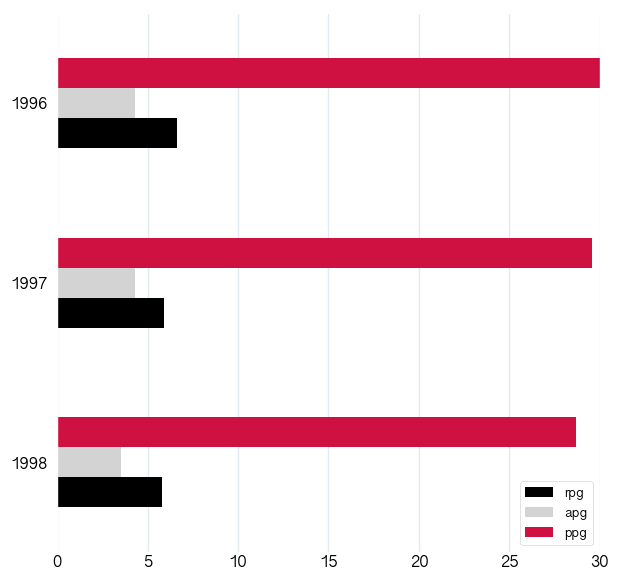

In [35]:
ax = mj_return.plot(kind='barh', x='year', y=['rpg', 'apg', 'ppg'], color=['#000000', '#d3d3d3', '#CE1141'], figsize=(7,7))

# ax.legend_.remove()
ax.yaxis.label.set_visible(False)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xlim(0, 30)

plt.savefig("mj_return_bars.pdf", transparent=True)

plt.show()

In [56]:
mj_pre_return = mj.iloc[6:9, :]

In [57]:
mj_pre_return['championship'] = [1, 1, 1]
mj_pre_return

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg,championship
6,1993,CHI,30,78,78,3067,2541,992,2003,49.5,...,522,428,221,61,207,188,32.6,5.5,6.7,1
7,1992,CHI,29,80,80,3102,2404,943,1818,51.9,...,511,489,182,75,200,201,30.0,6.1,6.4,1
8,1991,CHI,28,82,82,3034,2580,990,1837,53.9,...,492,453,223,83,202,229,31.5,5.5,6.0,1


In [58]:
lebron = pd.read_csv("lebron.csv")

In [62]:
# points per game = ppg
lebron['ppg'] = round(lebron.points / lebron.games_played, 1)

In [63]:
# assists per game = apg
lebron['apg'] = round(lebron.assists / lebron.games_played, 1)

In [64]:
# rebounds per game = rpg
lebron['rpg'] = round(lebron.rebounds / lebron.games_played, 1)
lebron.head()

,year,team,games_played,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,...,steals,blocks,personal_fouls,fantasy_points,double_doubles,triple_doubles,+/-,ppg,apg,rpg
0,2017-18,CLE,82,3026,2251,857,1580,54.2,149,406,...,116,71,136,4436.3,52,18,104,27.5,9.1,8.6
1,2016-17,CLE,74,2794,1954,736,1344,54.8,124,342,...,92,44,134,3794.8,42,13,483,26.4,8.7,8.6
2,2015-16,CLE,76,2708,1920,737,1416,52.0,87,282,...,104,49,143,3579.0,28,3,618,25.3,6.8,7.4
3,2014-15,CLE,69,2493,1743,624,1279,48.8,120,339,...,109,49,135,3210.7,22,2,539,25.3,7.4,6.0
4,2013-14,MIA,77,2902,2089,767,1353,56.7,116,306,...,121,26,126,3631.6,12,1,410,27.1,6.3,6.9


In [66]:
lebron['year'] = lebron.year.str.extract("(\d\d\d\d)")

In [68]:
lebron['year'] = lebron['year'].astype(int)

In [69]:
lebron['year'] = lebron['year'] + 1

In [73]:
lebron.to_csv("lebron_cleaned.csv", index=False)

In [4]:
lebron = pd.read_csv("lebron_cleaned.csv")
lebron

,year,team,games_played,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,...,steals,blocks,personal_fouls,fantasy_points,double_doubles,triple_doubles,+/-,ppg,apg,rpg
0,2018,CLE,82,3026,2251,857,1580,54.2,149,406,...,116,71,136,4436.3,52,18,104,27.5,9.1,8.6
1,2017,CLE,74,2794,1954,736,1344,54.8,124,342,...,92,44,134,3794.8,42,13,483,26.4,8.7,8.6
2,2016,CLE,76,2708,1920,737,1416,52.0,87,282,...,104,49,143,3579.0,28,3,618,25.3,6.8,7.4
3,2015,CLE,69,2493,1743,624,1279,48.8,120,339,...,109,49,135,3210.7,22,2,539,25.3,7.4,6.0
4,2014,MIA,77,2902,2089,767,1353,56.7,116,306,...,121,26,126,3631.6,12,1,410,27.1,6.3,6.9
5,2013,MIA,76,2877,2036,765,1354,56.5,103,254,...,129,67,110,3956.5,36,4,720,26.8,7.2,8.0
6,2012,MIA,62,2326,1683,621,1169,53.1,54,149,...,115,50,96,3135.9,23,0,473,27.1,6.2,7.9
7,2011,MIA,79,3063,2111,758,1485,51.0,92,279,...,124,50,163,3888.0,31,4,619,26.7,7.0,7.5
8,2010,CLE,76,2966,2258,768,1528,50.3,129,387,...,125,77,119,4244.3,31,4,648,29.7,8.6,7.3
9,2009,CLE,81,3054,2304,789,1613,48.9,132,384,...,137,93,139,4369.1,29,7,870,28.4,7.2,7.6


In [21]:
lebron_return = lebron.iloc[1:4, :]

In [22]:
lebron_return['championship'] = [0, 1, 0]

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
lebron_return

,year,team,games_played,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,...,blocks,personal_fouls,fantasy_points,double_doubles,triple_doubles,+/-,ppg,apg,rpg,championship
1,2017,CLE,74,2794,1954,736,1344,54.8,124,342,...,44,134,3794.8,42,13,483,26.4,8.7,8.6,0
2,2016,CLE,76,2708,1920,737,1416,52.0,87,282,...,49,143,3579.0,28,3,618,25.3,6.8,7.4,1
3,2015,CLE,69,2493,1743,624,1279,48.8,120,339,...,49,135,3210.7,22,2,539,25.3,7.4,6.0,0


/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


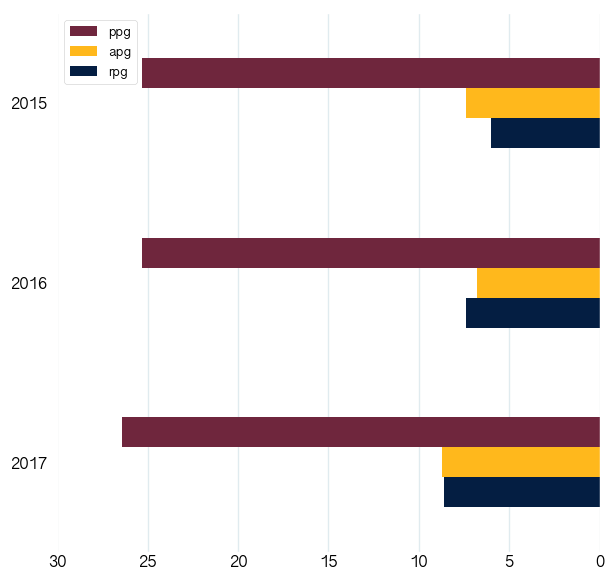

In [43]:
ax = lebron_return.sort_values(by='year').plot(kind='barh', x='year', y=['ppg', 'apg', 'rpg'], colors=['#6F263D', '#FFB81C', '#041E42'], figsize=(7,7))

# ax.legend_.remove()
ax.yaxis.label.set_visible(False)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xlim(0, 30)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig("lebron_return_bars.pdf", transparent=True)

plt.show()

In [18]:
lebron_pre_return = lebron.iloc[4:7, :]

In [19]:
lebron_pre_return['championship'] = [0, 1, 1]
lebron_pre_return

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,team,games_played,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,...,blocks,personal_fouls,fantasy_points,double_doubles,triple_doubles,+/-,ppg,apg,rpg,championship
4,2014,MIA,77,2902,2089,767,1353,56.7,116,306,...,26,126,3631.6,12,1,410,27.1,6.3,6.9,0
5,2013,MIA,76,2877,2036,765,1354,56.5,103,254,...,67,110,3956.5,36,4,720,26.8,7.2,8.0,1
6,2012,MIA,62,2326,1683,621,1169,53.1,54,149,...,50,96,3135.9,23,0,473,27.1,6.2,7.9,1


/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


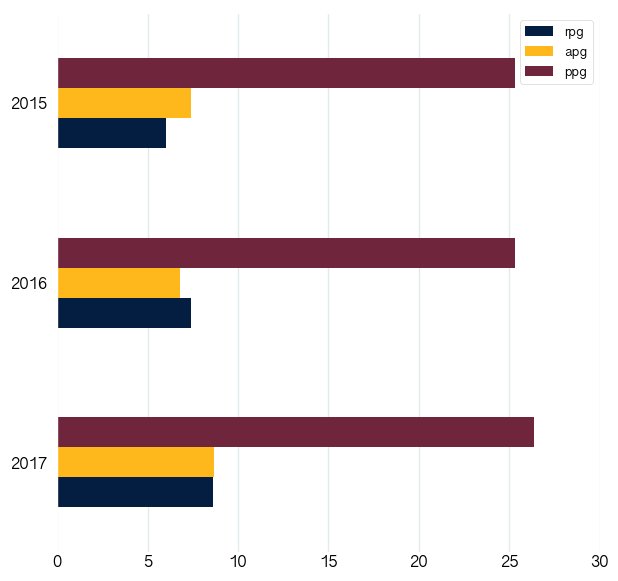

In [26]:
ax = lebron_return.plot(kind='barh', x='year', y=['rpg', 'apg', 'ppg'], colors=['#041E42', '#FFB81C', '#6F263D'], figsize=(7,7))

# ax.legend_.remove()
ax.yaxis.label.set_visible(False)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xlim(0, 30)

# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

plt.savefig("lebron_to_lebron_right.pdf", transparent=True)

plt.show()

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


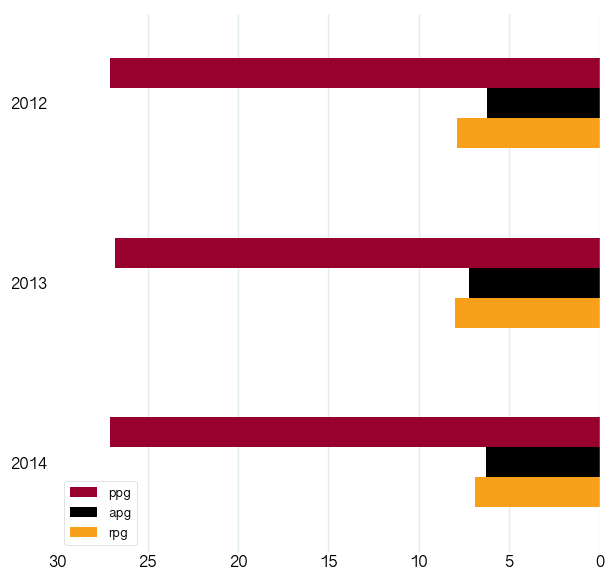

In [44]:
ax = lebron_pre_return.sort_values(by='year').plot(kind='barh', x='year', y=['ppg', 'apg', 'rpg'], colors=['#98002E', '#000000', '#F9A01B'], figsize=(7,7))

# ax.legend_.remove()
ax.yaxis.label.set_visible(False)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xlim(0, 30)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig("lebron_to_lebron_left.pdf", transparent=True)

plt.show()

In [37]:
mj_pre_return = mj.iloc[6:9, :]

In [38]:
mj_pre_return['championship'] = [1, 1, 1]
mj_pre_return

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,rebounds,assists,steals,blocks,turnovers,personal_fouls,ppg,apg,rpg,championship
6,1993,CHI,30,78,78,3067,2541,992,2003,49.5,...,522,428,221,61,207,188,32.6,5.5,6.7,1
7,1992,CHI,29,80,80,3102,2404,943,1818,51.9,...,511,489,182,75,200,201,30.0,6.1,6.4,1
8,1991,CHI,28,82,82,3034,2580,990,1837,53.9,...,492,453,223,83,202,229,31.5,5.5,6.0,1


/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


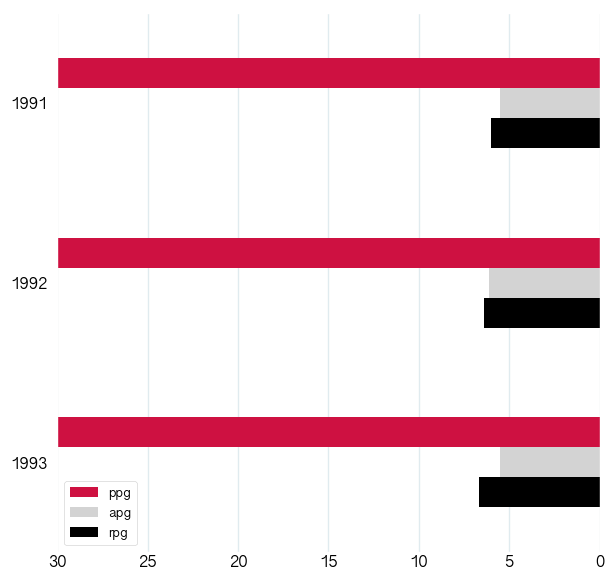

In [42]:
ax = mj_pre_return.sort_values(by='year').plot(kind='barh', x='year', y=['ppg', 'apg', 'rpg'], colors=['#CE1141', '#d3d3d3', '#000000'], figsize=(7,7))

# ax.legend_.remove()
ax.yaxis.label.set_visible(False)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xlim(0, 30)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig("mj_to_mj_left.pdf", transparent=True)

plt.show()